## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/Users/shamindras/PERSONAL/LEARNING/REPOS/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [74]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(
    sklearn_ds=load_breast_cancer(), n_estimators=10)

## Check out the data

In [75]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 5 rows of the training set features", X_train[:5], sep = ":\n")
print("\n")
print("first 5 rows of the training set outcomes", y_train[:5], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 5 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [79]:
all_rf_tree_data = irf_utils.get_rf_tree_data(rf=rf,
                                              X_train=X_train, y_train=y_train, 
                                              X_test=X_test, y_test=y_test)

## STEP 3: Get the RIT data and produce RITs

In [149]:
np.random.seed(12)
g = irf_utils.generate_rit_samples(all_rf_tree_data=all_rf_tree_data, bin_class_type=1)

In [150]:
for i in range(10):
    print(next(g))

[ 0 10 20 24 27]
[ 1  6 13 22 23 24]
[ 7 13 23 26 28]
[ 7 23 28]
[ 1  5  6 13 23 26]
[ 6  9 10 20 22 27 29]
[ 4  6  9 10 20 25 27]
[ 1  5  6 13 23 26]
[ 6  9 10 20 22 27 29]
[ 0 10 20 24 27]


# Step 4: Plot some Data

### List Ranked Feature Importances

In [78]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_outputs['feature_importances_rank_idx']
feature_importances = all_rf_outputs['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 20 (0.294270)
2. feature 23 (0.246163)
3. feature 22 (0.095275)
4. feature 7 (0.088542)
5. feature 6 (0.068028)
6. feature 26 (0.034007)
7. feature 27 (0.024631)
8. feature 24 (0.020245)
9. feature 0 (0.015324)
10. feature 28 (0.015231)
11. feature 13 (0.013823)
12. feature 3 (0.009706)
13. feature 1 (0.008211)
14. feature 4 (0.007102)
15. feature 29 (0.006801)
16. feature 25 (0.006115)
17. feature 9 (0.005294)
18. feature 2 (0.005136)
19. feature 10 (0.004665)
20. feature 17 (0.004292)
21. feature 19 (0.003996)
22. feature 12 (0.003848)
23. feature 21 (0.003743)
24. feature 15 (0.003576)
25. feature 5 (0.002950)
26. feature 14 (0.002440)
27. feature 18 (0.001854)
28. feature 16 (0.001778)
29. feature 8 (0.001585)
30. feature 11 (0.001370)


### Plot Ranked Feature Importances

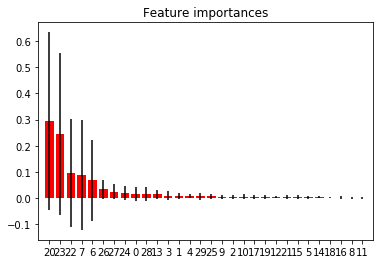

In [39]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

In [86]:
# Now plot the trees individually
#irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

In [87]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

In [89]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

## Get the leaf node 1's paths
Get the unique feature paths where the leaf node predicted class is just 1

In [164]:
uniq_feature_paths = all_rf_outputs['dtree0']['all_uniq_leaf_paths_features']
leaf_node_classes  = all_rf_outputs['dtree0']['all_leaf_node_classes']
ones_only = [i for i, j in zip(uniq_feature_paths, leaf_node_classes) 
               if j == 1]
ones_only

[array([ 1,  5,  6, 13, 23, 26]),
 array([ 1,  5,  6,  9, 13, 23, 26]),
 array([ 1,  6, 22, 23, 26]),
 array([ 1,  6, 13, 22, 23, 26]),
 array([ 1,  3, 23, 26, 27]),
 array([ 1,  3, 17, 19, 23, 26, 27]),
 array([ 1,  3, 19, 23, 26, 27]),
 array([ 3, 18, 23, 26]),
 array([ 3,  8, 23, 26]),
 array([ 3,  8, 22, 23, 26]),
 array([ 3,  4,  8, 22, 23, 26]),
 array([22, 23, 26])]

In [165]:
print("Number of leaf nodes", len(all_rf_outputs['dtree0']['all_uniq_leaf_paths_features']), sep = ":\n")
print("Number of leaf nodes with 1 class", len(ones_only), sep = ":\n")

Number of leaf nodes:
22
Number of leaf nodes with 1 class:
12


In [166]:
# Just pick the last seven cases, we are going to manually construct
# binary RIT of depth 3 i.e. max 2**3 -1 = 7 intersecting nodes
ones_only_seven = ones_only[-7:]
ones_only_seven

[array([ 1,  3, 17, 19, 23, 26, 27]),
 array([ 1,  3, 19, 23, 26, 27]),
 array([ 3, 18, 23, 26]),
 array([ 3,  8, 23, 26]),
 array([ 3,  8, 22, 23, 26]),
 array([ 3,  4,  8, 22, 23, 26]),
 array([22, 23, 26])]

In [167]:
# Construct a binary version of the RIT manually!
# This should come in useful for unit tests!
node0 = ones_only_seven[-1]
node1 = np.intersect1d(node0, ones_only_seven[-2])
node2 = np.intersect1d(node1, ones_only_seven[-3])
node3 = np.intersect1d(node1, ones_only_seven[-4])
node4 = np.intersect1d(node0, ones_only_seven[-5])
node5 = np.intersect1d(node4, ones_only_seven[-6])
node6 = np.intersect1d(node4, ones_only_seven[-7])

intersected_nodes_seven = [node0, node1, node2, node3, node4, node5, node6]

for idx, node in enumerate(intersected_nodes_seven):
    print("node" + str(idx), node)

node0 [22 23 26]
node1 [22 23 26]
node2 [22 23 26]
node3 [23 26]
node4 [23 26]
node5 [23 26]
node6 [23 26]


In [168]:
rit_output = reduce(np.union1d, (node2, node3, node5, node6))
rit_output

array([22, 23, 26])

In [90]:
irf_utils.select_random_path()

<generator object select_random_path at 0x11ce43048>

In [172]:
np.random.seed(12)
tree = irf_utils.build_tree(feature_paths=irf_utils.select_random_path(), 
                            max_depth=3, 
                            noisy_split=False, 
                            num_splits=5)

In [173]:
print("Root:\n", tree._val)
#print("Some child:\n", tree.children[0].children[1]._val)

Root:
 [ 0  1  4  5  6  8 12 13 14 16 17 19 23 24 25 30 31 33 34 35 37 39 40 41 42
 43 44 45 46 49 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 71 72 73
 74 76 78 79 80 83 84 85 86 87 89 90 92 93 96 97 99]


In [174]:
# If noisy split is False, this should pass
assert(len(tree) == 1 + 5 + 5**2)

In [175]:
list(tree.traverse_depth_first())

[(0, <utils.irf_utils.RITTree at 0x10e5e2908>),
 (1, <utils.irf_utils.RITNode at 0x10e5e2be0>),
 (2, <utils.irf_utils.RITNode at 0x110b43940>),
 (3, <utils.irf_utils.RITNode at 0x10e5e2fd0>),
 (4, <utils.irf_utils.RITNode at 0x10e6343c8>),
 (5, <utils.irf_utils.RITNode at 0x10e5e2f28>),
 (6, <utils.irf_utils.RITNode at 0x10e5e2c88>),
 (7, <utils.irf_utils.RITNode at 0x10e5e2f98>),
 (8, <utils.irf_utils.RITNode at 0x10e5e2e10>),
 (9, <utils.irf_utils.RITNode at 0x10e5e2f60>),
 (10, <utils.irf_utils.RITNode at 0x10e5e2c18>),
 (11, <utils.irf_utils.RITNode at 0x10e5e28d0>),
 (12, <utils.irf_utils.RITNode at 0x10e5e2e80>),
 (13, <utils.irf_utils.RITNode at 0x10e5e2d68>),
 (14, <utils.irf_utils.RITNode at 0x10e5e2940>),
 (15, <utils.irf_utils.RITNode at 0x10e5e2c50>),
 (16, <utils.irf_utils.RITNode at 0x10e5e2b70>),
 (17, <utils.irf_utils.RITNode at 0x10e5e2ba8>),
 (18, <utils.irf_utils.RITNode at 0x10e5e2ac8>),
 (19, <utils.irf_utils.RITNode at 0x10e5e2b38>),
 (20, <utils.irf_utils.RITNode

In [176]:
estimator0_out_fltr = irf_utils.filter_leaves_classifier(dtree_data=estimator0_out,bin_class_type=1)
estimator0_out_fltr

{'leaf_nodes_depths': [6, 7, 5, 6, 6, 8, 7, 4, 4, 5, 6, 3],
 'tot_leaf_node_values': [239, 8, 8, 2, 27, 1, 10, 7, 2, 2, 1, 6],
 'uniq_feature_paths': [array([ 1,  5,  6, 13, 23, 26]),
  array([ 1,  5,  6,  9, 13, 23, 26]),
  array([ 1,  6, 22, 23, 26]),
  array([ 1,  6, 13, 22, 23, 26]),
  array([ 1,  3, 23, 26, 27]),
  array([ 1,  3, 17, 19, 23, 26, 27]),
  array([ 1,  3, 19, 23, 26, 27]),
  array([ 3, 18, 23, 26]),
  array([ 3,  8, 23, 26]),
  array([ 3,  8, 22, 23, 26]),
  array([ 3,  4,  8, 22, 23, 26]),
  array([22, 23, 26])],
 'validation_metrics': {'accuracy_score': 0.91228070175438591,
  'confusion_matrix': array([[10,  4],
         [ 1, 42]]),
  'f1_score': 0.9438202247191011,
  'hamming_loss': 0.08771929824561403,
  'log_loss': 3.0297733397241098,
  'precision_score': 0.91304347826086951,
  'recall_score': 0.97674418604651159,
  'zero_one_loss': 0.087719298245614086}}

In [177]:
print("Total Number of classes", len(estimator0_out['all_leaf_node_classes']), sep=":\n")
print("Total Number of 1-value classes", sum(estimator0_out['all_leaf_node_classes']), sep=":\n")

Total Number of classes:
22
Total Number of 1-value classes:
12


In [180]:
print("Total Number of 1-value classes", len(estimator0_out_fltr['leaf_nodes_depths']), sep=":\n")

Total Number of 1-value classes:
12


In [181]:
all_rf_outputs['dtree0']['all_uniq_leaf_paths_features']

[array([ 1,  5,  6, 13, 23, 26]),
 array([ 1,  5,  6,  9, 13, 23, 26]),
 array([ 1,  5,  6,  9, 13, 23, 26]),
 array([ 1,  6, 13, 23, 26]),
 array([ 1,  6, 22, 23, 26]),
 array([ 1,  6, 13, 22, 23, 26]),
 array([ 1,  6, 13, 22, 23, 26]),
 array([ 1,  3, 23, 26, 27]),
 array([ 1,  3, 17, 19, 23, 26, 27]),
 array([ 1,  3, 17, 19, 23, 26, 27]),
 array([ 1,  3, 19, 23, 26, 27]),
 array([ 1,  3, 23, 26, 27]),
 array([ 1,  3, 23, 26]),
 array([ 3, 18, 23, 26]),
 array([ 3, 18, 23, 26]),
 array([ 3,  8, 23, 26]),
 array([ 3,  8, 22, 23, 26]),
 array([ 3,  4,  8, 22, 23, 26]),
 array([ 3,  4,  8, 22, 23, 26]),
 array([22, 23, 26]),
 array([22, 23, 26]),
 array([23, 26])]

In [41]:
irf_utils.filter_leaves_classifier(dtree_data=all_rf_outputs['dtree0'],bin_class_type=1)

{'f_leaf_nodes_depths': [6, 7, 5, 6, 6, 8, 7, 4, 4, 5, 6, 3],
 'f_tot_leaf_node_values': [239, 8, 8, 2, 27, 1, 10, 7, 2, 2, 1, 6],
 'f_uniq_feature_paths': [array([ 1,  5,  6, 13, 23, 26]),
  array([ 1,  5,  6,  9, 13, 23, 26]),
  array([ 1,  6, 22, 23, 26]),
  array([ 1,  6, 13, 22, 23, 26]),
  array([ 1,  3, 23, 26, 27]),
  array([ 1,  3, 17, 19, 23, 26, 27]),
  array([ 1,  3, 19, 23, 26, 27]),
  array([ 3, 18, 23, 26]),
  array([ 3,  8, 23, 26]),
  array([ 3,  8, 22, 23, 26]),
  array([ 3,  4,  8, 22, 23, 26]),
  array([22, 23, 26])]}

In [182]:
all_rf_outputs['dtree0']

{'all_leaf_node_classes': [1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0],
 'all_leaf_node_paths': [array([0, 1, 2, 3, 4, 5, 6]),
  array([0, 1, 2, 3, 4, 5, 7, 8]),
  array([0, 1, 2, 3, 4, 5, 7, 9]),
  array([ 0,  1,  2,  3,  4, 10]),
  array([ 0,  1,  2,  3, 11, 12]),
  array([ 0,  1,  2,  3, 11, 13, 14]),
  array([ 0,  1,  2,  3, 11, 13, 15]),
  array([ 0,  1,  2, 16, 17, 18, 19]),
  array([ 0,  1,  2, 16, 17, 18, 20, 21, 22]),
  array([ 0,  1,  2, 16, 17, 18, 20, 21, 23]),
  array([ 0,  1,  2, 16, 17, 18, 20, 24]),
  array([ 0,  1,  2, 16, 17, 25]),
  array([ 0,  1,  2, 16, 26]),
  array([ 0,  1, 27, 28, 29]),
  array([ 0,  1, 27, 28, 30]),
  array([ 0,  1, 27, 31, 32]),
  array([ 0,  1, 27, 31, 33, 34]),
  array([ 0,  1, 27, 31, 33, 35, 36]),
  array([ 0,  1, 27, 31, 33, 35, 37]),
  array([ 0, 38, 39, 40]),
  array([ 0, 38, 39, 41]),
  array([ 0, 38, 42])],
 'all_leaf_node_samples': [157,
  1,
  6,
  1,
  6,
  3,
  1,
  1

In [183]:
# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/Users/shamindras/PERSONAL/LEARNING/REPOS/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

In [184]:
filtered = irf_utils.filter_leaves_classifier(dtree_data=all_rf_outputs['dtree0'],bin_class_type=1)

In [185]:
filtered

{'leaf_nodes_depths': [6, 7, 5, 6, 6, 8, 7, 4, 4, 5, 6, 3],
 'tot_leaf_node_values': [239, 8, 8, 2, 27, 1, 10, 7, 2, 2, 1, 6],
 'uniq_feature_paths': [array([ 1,  5,  6, 13, 23, 26]),
  array([ 1,  5,  6,  9, 13, 23, 26]),
  array([ 1,  6, 22, 23, 26]),
  array([ 1,  6, 13, 22, 23, 26]),
  array([ 1,  3, 23, 26, 27]),
  array([ 1,  3, 17, 19, 23, 26, 27]),
  array([ 1,  3, 19, 23, 26, 27]),
  array([ 3, 18, 23, 26]),
  array([ 3,  8, 23, 26]),
  array([ 3,  8, 22, 23, 26]),
  array([ 3,  4,  8, 22, 23, 26]),
  array([22, 23, 26])],
 'validation_metrics': {'accuracy_score': 0.91228070175438591,
  'confusion_matrix': array([[10,  4],
         [ 1, 42]]),
  'f1_score': 0.9438202247191011,
  'hamming_loss': 0.08771929824561403,
  'log_loss': 3.0297733397241098,
  'precision_score': 0.91304347826086951,
  'recall_score': 0.97674418604651159,
  'zero_one_loss': 0.087719298245614086}}

In [186]:
filtered['validation_metrics']['accuracy_score']

0.91228070175438591

In [127]:
filtered['uniq_feature_paths']

[array([ 1,  5,  6, 13, 23, 26]),
 array([ 1,  5,  6,  9, 13, 23, 26]),
 array([ 1,  6, 22, 23, 26]),
 array([ 1,  6, 13, 22, 23, 26]),
 array([ 1,  3, 23, 26, 27]),
 array([ 1,  3, 17, 19, 23, 26, 27]),
 array([ 1,  3, 19, 23, 26, 27]),
 array([ 3, 18, 23, 26]),
 array([ 3,  8, 23, 26]),
 array([ 3,  8, 22, 23, 26]),
 array([ 3,  4,  8, 22, 23, 26]),
 array([22, 23, 26])]

In [50]:
import random
filtered

{'f_leaf_nodes_depths': [6, 7, 5, 6, 6, 8, 7, 4, 4, 5, 6, 3],
 'f_tot_leaf_node_values': [239, 8, 8, 2, 27, 1, 10, 7, 2, 2, 1, 6],
 'f_uniq_feature_paths': [array([ 1,  5,  6, 13, 23, 26]),
  array([ 1,  5,  6,  9, 13, 23, 26]),
  array([ 1,  6, 22, 23, 26]),
  array([ 1,  6, 13, 22, 23, 26]),
  array([ 1,  3, 23, 26, 27]),
  array([ 1,  3, 17, 19, 23, 26, 27]),
  array([ 1,  3, 19, 23, 26, 27]),
  array([ 3, 18, 23, 26]),
  array([ 3,  8, 23, 26]),
  array([ 3,  8, 22, 23, 26]),
  array([ 3,  4,  8, 22, 23, 26]),
  array([22, 23, 26])]}

In [48]:
random.choice([1,5,9,10,12])

5

In [130]:
random.choice(filtered['uniq_feature_paths'])

array([ 0,  6, 10, 14, 20, 24, 27])

In [55]:
from scipy import stats

In [107]:
def weighted_choice(values, weights):
    """Discrete distribution, drawing values with the frequency specified in weights.
    
    Weights do not need to be normalized.
    """
    if not len(weights) == len(values):
        raise ValueError('Equal number of values and weights expected')
    weights = np.array(weights)
    weights = weights / weights.sum()
    dist = stats.rv_discrete(values=(range(len(weights)), weights))
    while True:
        yield values[dist.rvs()]

In [108]:
g = weighted_choice(filtered['uniq_feature_paths'], filtered['tot_leaf_node_values'])

In [109]:
for i in range(100):
    print(next(g))

[ 0 10 20 24 27]
[ 0 10 20 24 27]
[20 22 24]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 7 17 20 28]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 7 17 20 28]
[ 0  6 10 14 20 24 27]
[ 6 20 21 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 6 20 21 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[20 22 24]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[10 20 24 27 28]
[

In [110]:
filtered0 = irf_utils.filter_leaves_classifier(dtree_data=all_rf_outputs['dtree0'],bin_class_type=1)
filtered1 = irf_utils.filter_leaves_classifier(dtree_data=all_rf_outputs['dtree1'],bin_class_type=1)

In [95]:
filtered0 = irf_utils.filter_leaves_classifier(dtree_data=all_rf_tree_data['dtree0'],bin_class_type=1)

In [113]:
from scipy import stats
def weighted_choice(values, weights):
    """Discrete distribution, drawing values with the frequency specified in weights.
    
    Weights do not need to be normalized.
    """
    if not len(weights) == len(values):
        raise ValueError('Equal number of values and weights expected')
    weights = np.array(weights)
    # normalize the weights
    weights = weights / weights.sum()
    dist = stats.rv_discrete(values=(range(len(weights)), weights))
    while True:
        yield values[dist.rvs()]

In [100]:
bin_class_type = 1
n_estimators = all_rf_tree_data['rf_obj'].n_estimators

all_weights = []
all_paths = []
for tree in range(n_estimators):
    filtered = irf_utils.filter_leaves_classifier(
        dtree_data=all_rf_tree_data['dtree{}'.format(tree)],
        bin_class_type=bin_class_type)
    all_weights.extend(filtered['tot_leaf_node_values'])
    all_paths.extend(filtered['uniq_feature_paths'])

g = weighted_choice(all_paths, all_weights)

In [130]:
# CHECK with SVW: how to set the random seed
np.random.seed(12)
def generate_rit_samples(all_rf_tree_data, bin_class_type = 1):
    # Number of decision trees
    n_estimators = all_rf_tree_data['rf_obj'].n_estimators
    
    all_weights = []
    all_paths = []
    for tree in range(n_estimators):
        filtered = irf_utils.filter_leaves_classifier(
            dtree_data=all_rf_tree_data['dtree{}'.format(tree)],
            bin_class_type=bin_class_type)
        all_weights.extend(filtered['tot_leaf_node_values'])
        all_paths.extend(filtered['uniq_feature_paths'])

    # Return the generator of randomly sampled observations 
    # by specified weights
    return weighted_choice(all_paths, all_weights)

In [131]:
g = generate_rit_samples(all_rf_tree_data=all_rf_tree_data, bin_class_type=1)

In [132]:
for i in range(10):
    print(next(g))

[ 0 10 20 24 27]
[ 1  6 13 22 23 24]
[ 7 13 23 26 28]
[ 7 23 28]
[ 1  5  6 13 23 26]
[ 6  9 10 20 22 27 29]
[ 4  6  9 10 20 25 27]
[ 1  5  6 13 23 26]
[ 6  9 10 20 22 27 29]
[ 0 10 20 24 27]


In [92]:
filtered0

{'leaf_nodes_depths': [6, 7, 5, 6, 6, 8, 7, 4, 4, 5, 6, 3],
 'tot_leaf_node_values': [239, 8, 8, 2, 27, 1, 10, 7, 2, 2, 1, 6],
 'uniq_feature_paths': [array([ 1,  5,  6, 13, 23, 26]),
  array([ 1,  5,  6,  9, 13, 23, 26]),
  array([ 1,  6, 22, 23, 26]),
  array([ 1,  6, 13, 22, 23, 26]),
  array([ 1,  3, 23, 26, 27]),
  array([ 1,  3, 17, 19, 23, 26, 27]),
  array([ 1,  3, 19, 23, 26, 27]),
  array([ 3, 18, 23, 26]),
  array([ 3,  8, 23, 26]),
  array([ 3,  8, 22, 23, 26]),
  array([ 3,  4,  8, 22, 23, 26]),
  array([22, 23, 26])],
 'validation_metrics': {'accuracy_score': 0.91228070175438591,
  'confusion_matrix': array([[10,  4],
         [ 1, 42]]),
  'f1_score': 0.9438202247191011,
  'hamming_loss': 0.08771929824561403,
  'log_loss': 3.0297733397241098,
  'precision_score': 0.91304347826086951,
  'recall_score': 0.97674418604651159,
  'zero_one_loss': 0.087719298245614086}}

In [129]:
all_weights = []
all_paths = []
for tree in range(2):
    filtered = irf_utils.filter_leaves_classifier(dtree_data=all_rf_outputs['dtree{}'.format(tree)],
                                                  bin_class_type=1)
    all_weights.extend(filtered['tot_leaf_node_values'])
    all_paths.extend(filtered['uniq_feature_paths'])

g = weighted_choice(all_paths, all_weights)

In [113]:
all_weights

[239, 8, 8, 2, 27, 1, 10, 7, 2, 2, 1, 6, 189, 5, 101, 1, 3, 2, 1, 7, 3, 2, 7]

In [114]:
all_paths

[array([ 1,  5,  6, 13, 23, 26]),
 array([ 1,  5,  6,  9, 13, 23, 26]),
 array([ 1,  6, 22, 23, 26]),
 array([ 1,  6, 13, 22, 23, 26]),
 array([ 1,  3, 23, 26, 27]),
 array([ 1,  3, 17, 19, 23, 26, 27]),
 array([ 1,  3, 19, 23, 26, 27]),
 array([ 3, 18, 23, 26]),
 array([ 3,  8, 23, 26]),
 array([ 3,  8, 22, 23, 26]),
 array([ 3,  4,  8, 22, 23, 26]),
 array([22, 23, 26]),
 array([ 0, 10, 20, 24, 27]),
 array([ 0,  6, 10, 14, 20, 24, 27]),
 array([ 0,  6, 10, 14, 20, 24, 27]),
 array([ 0,  6, 10, 18, 20, 24, 27]),
 array([10, 20, 24, 27, 28]),
 array([ 6, 20, 21, 24, 27]),
 array([ 6, 12, 20, 21, 24, 27]),
 array([ 6, 20, 21, 24, 27]),
 array([20, 22, 24]),
 array([ 7, 17, 20, 29]),
 array([ 7, 17, 20, 28])]

In [112]:
for i in range(50):
    print(next(g))

[ 0 10 20 24 27]
[ 1  6 22 23 26]
[ 1  3 23 26 27]
[ 3 18 23 26]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[22 23 26]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 1  5  6 13 23 26]
[ 0  6 10 14 20 24 27]
[ 1  5  6 13 23 26]
[ 1  5  6 13 23 26]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 1  5  6 13 23 26]
[ 1  5  6  9 13 23 26]
[ 1  5  6 13 23 26]
[ 6 20 21 24 27]
[ 0  6 10 14 20 24 27]
[ 1  5  6 13 23 26]
[ 1  5  6 13 23 26]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 0 10 20 24 27]
[ 1  3 23 26 27]
[ 1  5  6 13 23 26]
[ 0 10 20 24 27]
[ 7 17 20 28]
[ 1  5  6 13 23 26]
[ 0 10 20 24 27]
[ 1  5  6 13 23 26]
[ 1  5  6 13 23 26]
[ 0  6 10 14 20 24 27]
[ 0 10 20 24 27]
[ 0  6 10 14 20 24 27]
[ 3 18 23 26]
[ 1  5  6 13 23 26]
[ 1  3 19 23 26 27]
[ 0  6 10 14 20 24 27]
[ 1  3 19 23 26 27]
[ 0  6 10 14 20 24 27]
[ 1  5  6 13 23 26]
[ 0 10 20 24 27]
[ 1  5  6 13 23 26]
